https://anakin297.medium.com/clustering-with-python-hdbscan-964fb8292ace

# HDBSCAN

In [1]:
import pandas as pd
import hdbscan as hd
import numpy as np
import matplotlib.pyplot as plt
import umap 

/mnt/home/kim/venvs/my_environment/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/mnt/home/kim/venvs/my_environment/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/mnt/home/kim/venvs/my_environment/lib/python3.9/site-packages/umap/dist

## 1. dataset
* embeddings: distilbert
* data: concatenated responses

In [118]:
# import data
emb = pd.read_json('~/thesis/embeddings/response_distilbert_mentions.jsonl', orient = 'index')

In [119]:
emb.head(5)

,mentions,embeddings
200015,racim blacks whites false information,"[-0.0944291651, 0.11583015320000001, -0.522738..."
200022,coming together country,"[-0.227941528, -0.2221784741, 0.0722830296, -0..."
200039,severe political polarization allow compromise...,"[-0.2165557146, -0.1016257405, -0.106548383800..."
200046,pandemic covid 19 unemployment lot people loss...,"[-0.22202694420000002, -0.0646716952, -0.09666..."
200053,globalism fake covid law order blm public educ...,"[0.002051929, 0.0412162021, -0.201424107000000..."


In [120]:
# "transform embedding"
from ast import literal_eval
emb['embeddings'] = emb['embeddings'].apply(np.array)  # convert list to numpy array
matrix = np.vstack(emb['embeddings'].values)
matrix.shape

(7298, 768)

In [121]:
X = matrix.copy()

## modelling: HDBSCAN

In [122]:
# reproducibility assured
np.random.seed(11)

model = hd.HDBSCAN(min_cluster_size = 10, min_samples = 10)

In [123]:
labels = model.fit_predict(X)

array([-1,  0,  1,  2])

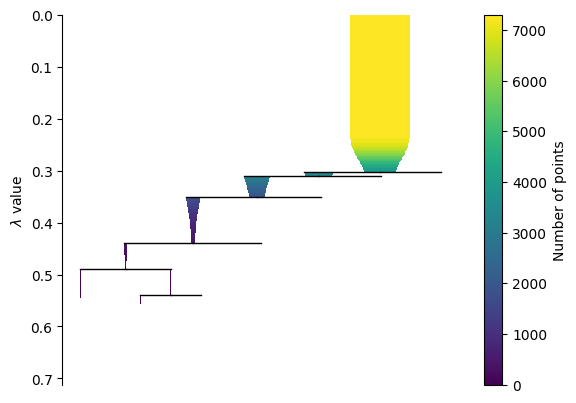

In [124]:
model.condensed_tree_.plot(select_clusters = False)

np.unique(labels)

horizontal line == cluster. 

therefore, my data includes many clusters.-> finetuning, it can change the number of clusters and the size of clusters

In [128]:
# Cluster labels obtained from clustering algorithm

from sklearn import metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist

final_cluster_labels = labels # cluster_labels_from_bert
X # contextualized tokens of the input texts.

# Specify the question that is addressed. 
print("\n\"Question 1\"\n")

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, final_cluster_labels)
print(f"Silhouette Coefficient: {silhouette}")

# Calculate Calinski-Harabasz Index
calinski = calinski_harabasz_score(X, final_cluster_labels)
print(f"Calinski-Harabasz Index: {calinski}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, final_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


"Question 1"

Silhouette Coefficient: 0.05606883336757587
Calinski-Harabasz Index: 642.5285799238302
Davies-Bouldin Index: 1.8432398785202315


## 2D visualization: UMAP
check the clustering when reducing the dimensionality

In [125]:
# high dimensional data to 2D data
reducer_2d = umap.UMAP(n_components=2, random_state=42)
embedding_2d = reducer_2d.fit_transform(X)

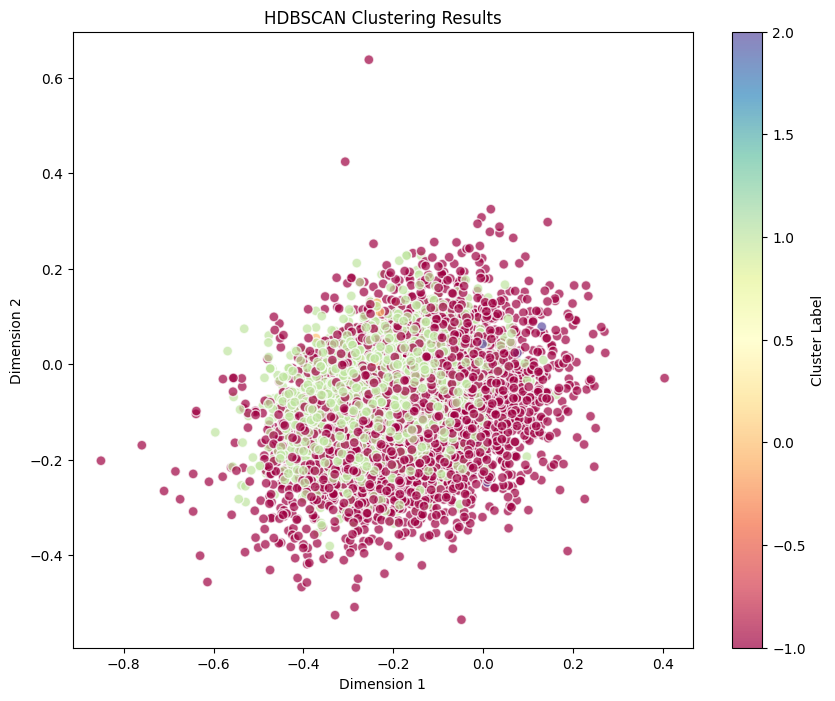

In [126]:
# Plotting
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Spectral', alpha=0.7, edgecolors='w', s=50)
plt.colorbar(scatter, label='Cluster Label')
plt.title('HDBSCAN Clustering Results')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

## try: dimensionality reduction(umap) results in worse clustering map

array([0, 1, 2])

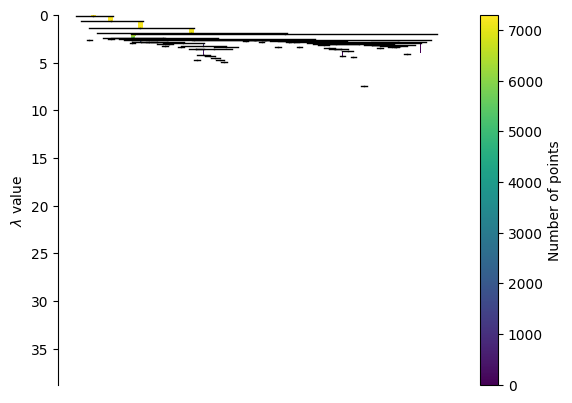

In [129]:
# Step 3: Dimensionality reduction with UMAP to higher dimensions
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=10, random_state=42)
embedding_high_dim = reducer.fit_transform(X)

# Step 4: Clustering with HDBSCAN
# reproduciblity
np.random.seed(11)

model = hd.HDBSCAN(min_cluster_size = 10, min_samples = 10)
labels = model.fit_predict(embedding_high_dim)
model.condensed_tree_.plot(select_clusters = False)

np.unique(labels)

In [130]:
# Cluster labels obtained from clustering algorithm

from sklearn import metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist

final_cluster_labels = labels # cluster_labels_from_bert
X # contextualized tokens of the input texts.

# Specify the question that is addressed. 
print("\n\"Question 1\"\n")

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, final_cluster_labels)
print(f"Silhouette Coefficient: {silhouette}")

# Calculate Calinski-Harabasz Index
calinski = calinski_harabasz_score(X, final_cluster_labels)
print(f"Calinski-Harabasz Index: {calinski}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, final_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


"Question 1"

Silhouette Coefficient: 0.11860650384127532
Calinski-Harabasz Index: 50.91480096792752
Davies-Bouldin Index: 1.381212021780102


## 2. dataset
* embeddings: word2vec
* data: concatenated responses

In [163]:
# import data
emb = pd.read_json('~/thesis/embeddings/response_word2vec_mentions.jsonl', orient = 'index')

In [164]:
emb.head(5)

,mentions,embeddings
200015,racim blacks whites false information,"[0.0197753906, -0.0796718597, 0.0830841064, -0..."
200022,coming together country,"[-0.026041666, 0.0813802108, 0.0262451172, 0.1..."
200039,severe political polarization allow compromise...,"[-0.0187310111, 0.0159751046, -0.0381401926000..."
200046,pandemic covid 19 unemployment lot people loss...,"[0.1451924592, -0.0740356445, -0.0918477401, 0..."
200053,globalism fake covid law order blm public educ...,"[0.08082491160000001, -0.0074424744, 0.0792020..."


In [165]:
# "transform embedding"
from ast import literal_eval
emb['embeddings'] = emb['embeddings'].apply(np.array)  # convert list to numpy array
matrix = np.vstack(emb['embeddings'].values)
matrix.shape

(7298, 300)

In [166]:
X = matrix.copy()

In [167]:
# reproducibility assured
np.random.seed(11)

model = hd.HDBSCAN(min_cluster_size = 10, min_samples = 10)

In [168]:
labels = model.fit_predict(X)

array([-1,  0,  1,  2,  3,  4,  5,  6])

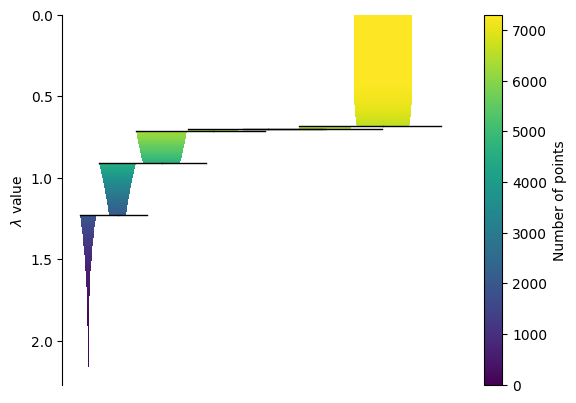

In [169]:
model.condensed_tree_.plot(select_clusters = False)

np.unique(labels)

In [170]:
# Cluster labels obtained from clustering algorithm

from sklearn import metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist

final_cluster_labels = labels # cluster_labels_from_bert
X # contextualized tokens of the input texts.

# Specify the question that is addressed. 
print("\n\"Question 1\"\n")

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, final_cluster_labels)
print(f"Silhouette Coefficient: {silhouette}")

# Calculate Calinski-Harabasz Index
calinski = calinski_harabasz_score(X, final_cluster_labels)
print(f"Calinski-Harabasz Index: {calinski}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, final_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


"Question 1"

Silhouette Coefficient: -0.10358408524224288
Calinski-Harabasz Index: 98.51539710165447
Davies-Bouldin Index: 2.0411073946503864


## 2D visualization: UMAP
check the clustering when reducing the dimensionality

In [85]:
# high dimensional data to 2D data
reducer_2d = umap.UMAP(n_components=2, random_state=42)
embedding_2d = reducer_2d.fit_transform(X)

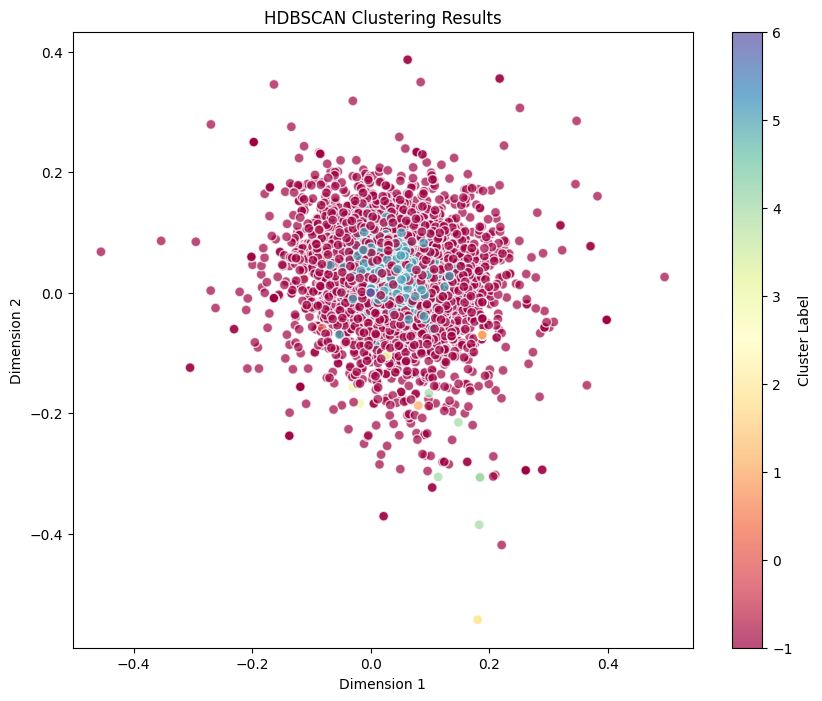

In [86]:
# Plotting
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Spectral', alpha=0.7, edgecolors='w', s=50)
plt.colorbar(scatter, label='Cluster Label')
plt.title('HDBSCAN Clustering Results')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

## 3. dataset
* embeddings: glove
* data: concatenated responses

In [40]:
# import data
emb = pd.read_json('~/thesis/embeddings/response_glove_mentions.jsonl', orient = 'index')

In [41]:
emb.head(5)

,mentions,embeddings
200015,racim blacks whites false information,"[-0.2308297604, -0.1573502421, -0.2432750016, ..."
200022,coming together country,"[-0.23055869340000001, 0.2900223434, 0.1191700..."
200039,severe political polarization allow compromise...,"[-0.0239808857, 0.0263355542, 0.0540418625, 0...."
200046,pandemic covid 19 unemployment lot people loss...,"[-0.022091141, 0.1731004417, -0.1327654272, -0..."
200053,globalism fake covid law order blm public educ...,"[-0.0227783415, -0.0764956623, 0.1342699528, -..."


In [42]:
# "transform embedding"
from ast import literal_eval
emb['embeddings'] = emb['embeddings'].apply(np.array)  # convert list to numpy array
matrix = np.vstack(emb['embeddings'].values)
matrix.shape

(7298, 300)

In [43]:
X = matrix.copy()

In [44]:
# reproducibility assured
np.random.seed(11)

model = hd.HDBSCAN(min_cluster_size = 10, min_samples = 10)

In [45]:
labels = model.fit_predict(X)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7])

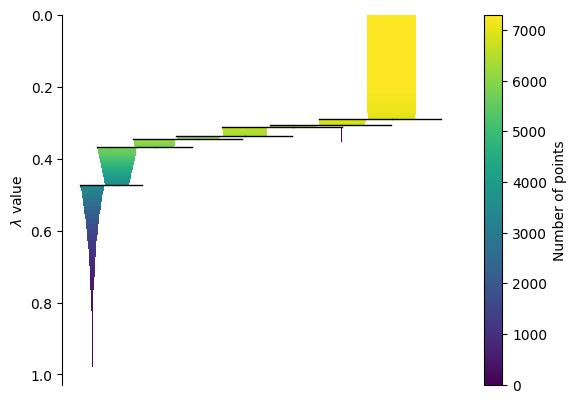

In [46]:
model.condensed_tree_.plot(select_clusters = False)

np.unique(labels)

In [47]:
# Cluster labels obtained from clustering algorithm

from sklearn import metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist

final_cluster_labels = labels # cluster_labels_from_bert
X # contextualized tokens of the input texts.

# Specify the question that is addressed. 
print("\n\"Question 1\"\n")

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, final_cluster_labels)
print(f"Silhouette Coefficient: {silhouette}")

# Calculate Calinski-Harabasz Index
calinski = calinski_harabasz_score(X, final_cluster_labels)
print(f"Calinski-Harabasz Index: {calinski}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, final_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


"Question 1"

Silhouette Coefficient: 0.07511266521530185
Calinski-Harabasz Index: 87.1812270408338
Davies-Bouldin Index: 1.9021468248841051


## 2D visualization: UMAP
check the clustering when reducing the dimensionality

In [48]:
# high dimensional data to 2D data
reducer_2d = umap.UMAP(n_components=2, random_state=42)
embedding_2d = reducer_2d.fit_transform(X)

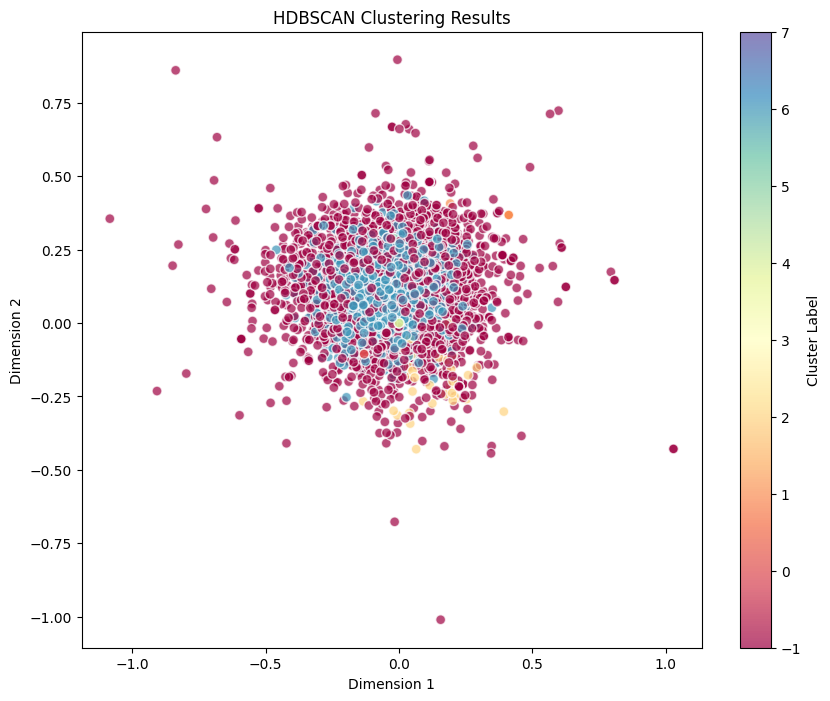

In [49]:
# Plotting
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Spectral', alpha=0.7, edgecolors='w', s=50)
plt.colorbar(scatter, label='Cluster Label')
plt.title('HDBSCAN Clustering Results')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

## 4. dataset
* embeddings: distilbert
* data: concatenated embeddings(flat)

In [131]:
# import data
emb = pd.read_json('~/thesis/embeddings/response_distilbert_mentions_flat.jsonl', orient = 'index')

In [132]:
emb.head(5)

,mentions_flat
200015,"[-0.0944291651, 0.11583015320000001, -0.522738..."
200022,"[-0.227941528, -0.2221784741, 0.0722830296, -0..."
200039,"[-0.31465277080000004, -0.1669896692, -0.14315..."
200046,"[-0.44672465320000004, -0.21085768940000002, -..."
200053,"[-0.1235457361, -0.0382902212, -0.2772190571, ..."


In [133]:
# "transform embedding"
from ast import literal_eval
emb['mentions_flat'] = emb['mentions_flat'].apply(np.array)  # convert list to numpy array
matrix = np.vstack(emb['mentions_flat'].values)
matrix.shape

(7298, 2304)

In [134]:
X = matrix.copy()

In [135]:
# reproducibility assured
np.random.seed(11)

model = hd.HDBSCAN(min_cluster_size = 10, min_samples = 10)

In [136]:
labels = model.fit_predict(X)

array([0, 1])

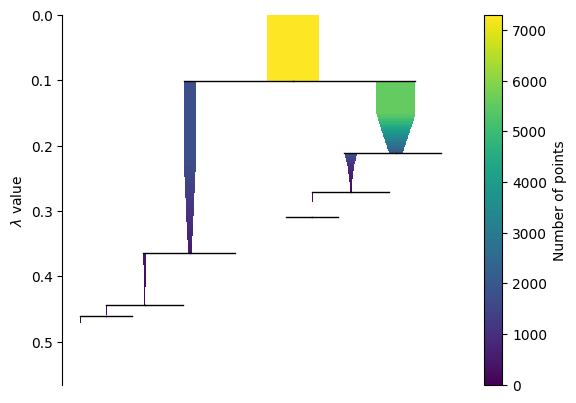

In [137]:
model.condensed_tree_.plot(select_clusters = False)

np.unique(labels)

In [138]:
# Cluster labels obtained from clustering algorithm

from sklearn import metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist

final_cluster_labels = labels # cluster_labels_from_bert
X # contextualized tokens of the input texts.

# Specify the question that is addressed. 
print("\n\"Question 1\"\n")

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, final_cluster_labels)
print(f"Silhouette Coefficient: {silhouette}")

# Calculate Calinski-Harabasz Index
calinski = calinski_harabasz_score(X, final_cluster_labels)
print(f"Calinski-Harabasz Index: {calinski}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, final_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


"Question 1"

Silhouette Coefficient: 0.4563905922840755
Calinski-Harabasz Index: 6188.326693341472
Davies-Bouldin Index: 0.8083367617080778


## 2D visualization: UMAP
check the clustering when reducing the dimensionality

In [103]:
# high dimensional data to 2D data
reducer_2d = umap.UMAP(n_components=2, random_state=42)
embedding_2d = reducer_2d.fit_transform(X)

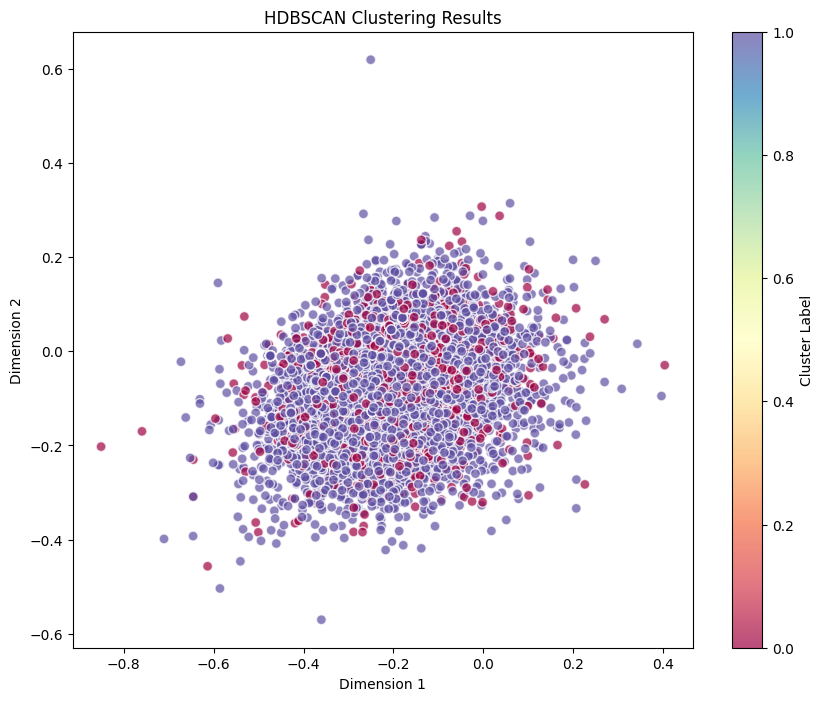

In [104]:
# Plotting
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Spectral', alpha=0.7, edgecolors='w', s=50)
plt.colorbar(scatter, label='Cluster Label')
plt.title('HDBSCAN Clustering Results')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

## try: dimensionality reduction(umap) results -> bad

array([0, 1, 2])

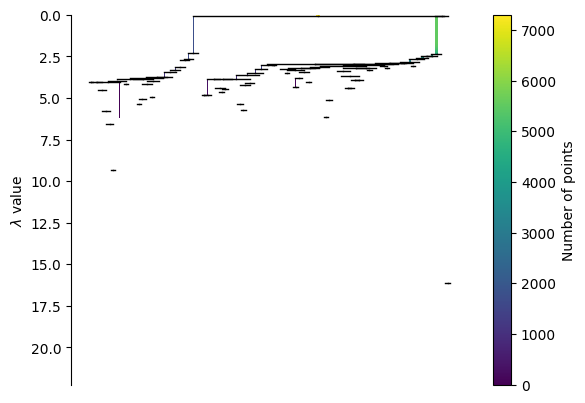

In [143]:
# Step 3: Dimensionality reduction with UMAP to higher dimensions
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=100, random_state=42)
embedding_high_dim = reducer.fit_transform(X)

# Step 4: Clustering with HDBSCAN
# reproduciblity
np.random.seed(11)

model = hd.HDBSCAN(min_cluster_size = 10, min_samples = 10)
labels = model.fit_predict(embedding_high_dim)
model.condensed_tree_.plot(select_clusters = False)

np.unique(labels)

In [144]:
# Cluster labels obtained from clustering algorithm

from sklearn import metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist

final_cluster_labels = labels # cluster_labels_from_bert
X # contextualized tokens of the input texts.

# Specify the question that is addressed. 
print("\n\"Question 1\"\n")

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, final_cluster_labels)
print(f"Silhouette Coefficient: {silhouette}")

# Calculate Calinski-Harabasz Index
calinski = calinski_harabasz_score(X, final_cluster_labels)
print(f"Calinski-Harabasz Index: {calinski}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, final_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


"Question 1"

Silhouette Coefficient: 0.25003253237084666
Calinski-Harabasz Index: 3148.5008123483167
Davies-Bouldin Index: 1.2950172364619377


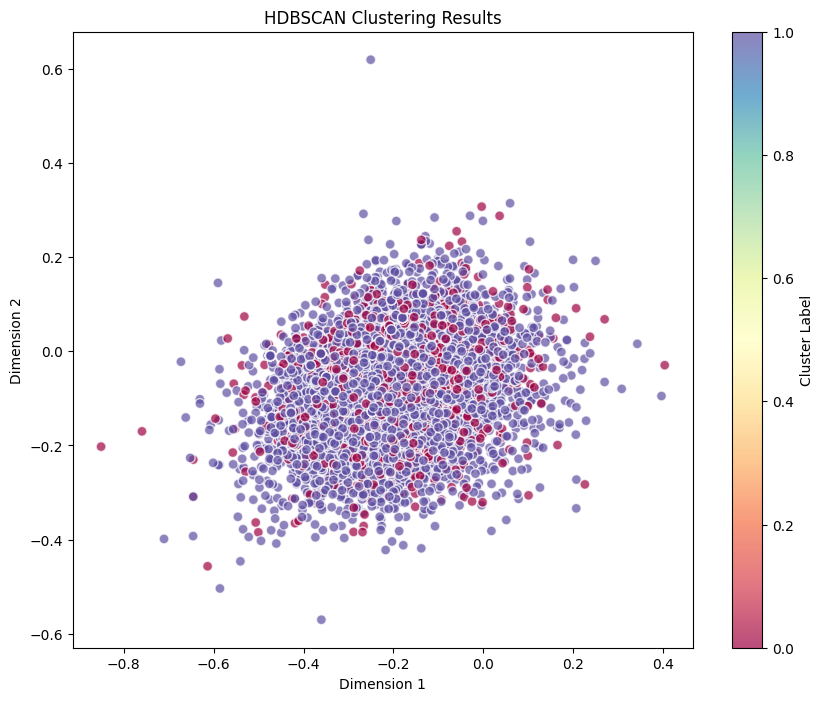

In [104]:
# Plotting
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Spectral', alpha=0.7, edgecolors='w', s=50)
plt.colorbar(scatter, label='Cluster Label')
plt.title('HDBSCAN Clustering Results')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

## 5. dataset
* embeddings: glove
* data: concatenated embeddings(flat)

In [153]:
# import data
emb = pd.read_json('~/thesis/embeddings/response_glove_mentions_flat.jsonl', orient = 'index')

In [154]:
emb.head(5)

,mentions_flat
200015,"[-0.2308297604, -0.1573502421, -0.2432750016, ..."
200022,"[-0.23055869340000001, 0.2900223434, 0.1191700..."
200039,"[-0.14190165700000001, -0.0474033356, 0.027152..."
200046,"[-0.12949000300000002, -0.0235114992, 0.252577..."
200053,"[-0.005518920300000001, -0.0498059951, 0.06463..."


In [155]:
# "transform embedding"
from ast import literal_eval
emb['mentions_flat'] = emb['mentions_flat'].apply(np.array)  # convert list to numpy array
matrix = np.vstack(emb['mentions_flat'].values)
matrix.shape

(7298, 900)

In [156]:
X = matrix.copy()

In [157]:
# reproducibility assured
np.random.seed(11)

model = hd.HDBSCAN(min_cluster_size = 10, min_samples = 10)

In [158]:
labels = model.fit_predict(X)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

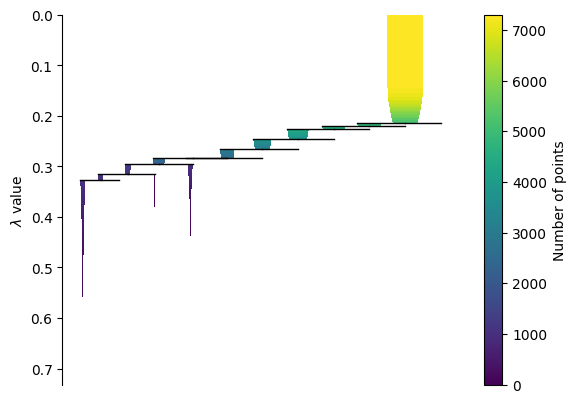

In [159]:
model.condensed_tree_.plot(select_clusters = False)

np.unique(labels)

In [160]:
# Cluster labels obtained from clustering algorithm

from sklearn import metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist

final_cluster_labels = labels # cluster_labels_from_bert
X # contextualized tokens of the input texts.

# Specify the question that is addressed. 
print("\n\"Question 1\"\n")

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, final_cluster_labels)
print(f"Silhouette Coefficient: {silhouette}")

# Calculate Calinski-Harabasz Index
calinski = calinski_harabasz_score(X, final_cluster_labels)
print(f"Calinski-Harabasz Index: {calinski}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, final_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


"Question 1"

Silhouette Coefficient: -0.0756930392975583
Calinski-Harabasz Index: 76.46682818178905
Davies-Bouldin Index: 1.900386369313506


## 2D visualization: UMAP
check the clustering when reducing the dimensionality

In [161]:
# high dimensional data to 2D data
reducer_2d = umap.UMAP(n_components=2, random_state=42)
embedding_2d = reducer_2d.fit_transform(X)

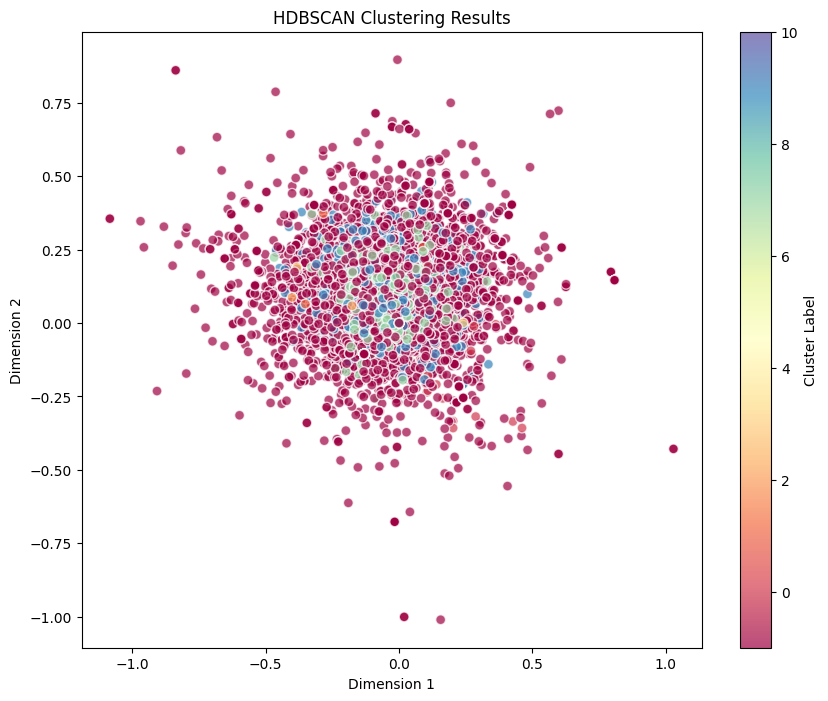

In [162]:
# Plotting
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Spectral', alpha=0.7, edgecolors='w', s=50)
plt.colorbar(scatter, label='Cluster Label')
plt.title('HDBSCAN Clustering Results')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

## 6. dataset
* embeddings: word2vec
* data: concatenated embeddings(flat)

In [2]:
# import data
emb = pd.read_json('~/thesis/embeddings/response_word2vec_mentions_flat.jsonl', orient = 'index')

In [3]:
emb.head(5)

,mentions_flat
200015,"[0.0197753906, -0.0796718597, 0.0830841064, -0..."
200022,"[-0.026041666, 0.0813802108, 0.0262451172, 0.1..."
200039,"[0.024068197200000002, -0.014530181900000001, ..."
200046,"[0.1806640625, -0.54296875, 0.0059204102, 0.59..."
200053,"[0.06853692980000001, 0.0031908208000000003, 0..."


In [4]:
# "transform embedding"
from ast import literal_eval
emb['mentions_flat'] = emb['mentions_flat'].apply(np.array)  # convert list to numpy array
matrix = np.vstack(emb['mentions_flat'].values)
matrix.shape

(7298, 900)

In [5]:
X = matrix.copy()

In [6]:
# reproducibility assured
np.random.seed(11)

model = hd.HDBSCAN(min_cluster_size = 10, min_samples = 10)

In [7]:
labels = model.fit_predict(X)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

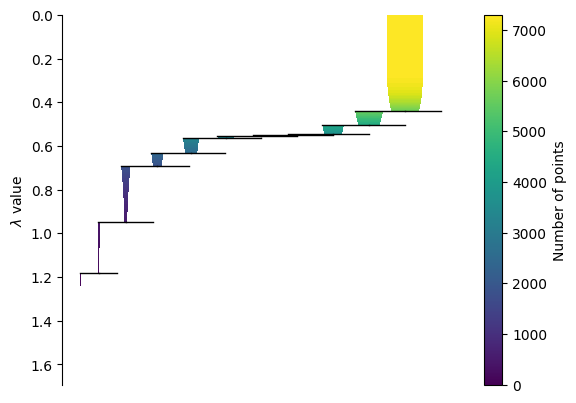

In [8]:
model.condensed_tree_.plot(select_clusters = False)

np.unique(labels)

In [9]:
# Cluster labels obtained from clustering algorithm

from sklearn import metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist

final_cluster_labels = labels # cluster_labels_from_bert
X # contextualized tokens of the input texts.

# Specify the question that is addressed. 
print("\n\"Question 1\"\n")

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, final_cluster_labels)
print(f"Silhouette Coefficient: {silhouette}")

# Calculate Calinski-Harabasz Index
calinski = calinski_harabasz_score(X, final_cluster_labels)
print(f"Calinski-Harabasz Index: {calinski}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, final_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


"Question 1"

Silhouette Coefficient: -0.2529731008666463
Calinski-Harabasz Index: 46.00170788635422
Davies-Bouldin Index: 2.0260164305851567


## 2D visualization: UMAP
check the clustering when reducing the dimensionality

In [161]:
# high dimensional data to 2D data
reducer_2d = umap.UMAP(n_components=2, random_state=42)
embedding_2d = reducer_2d.fit_transform(X)

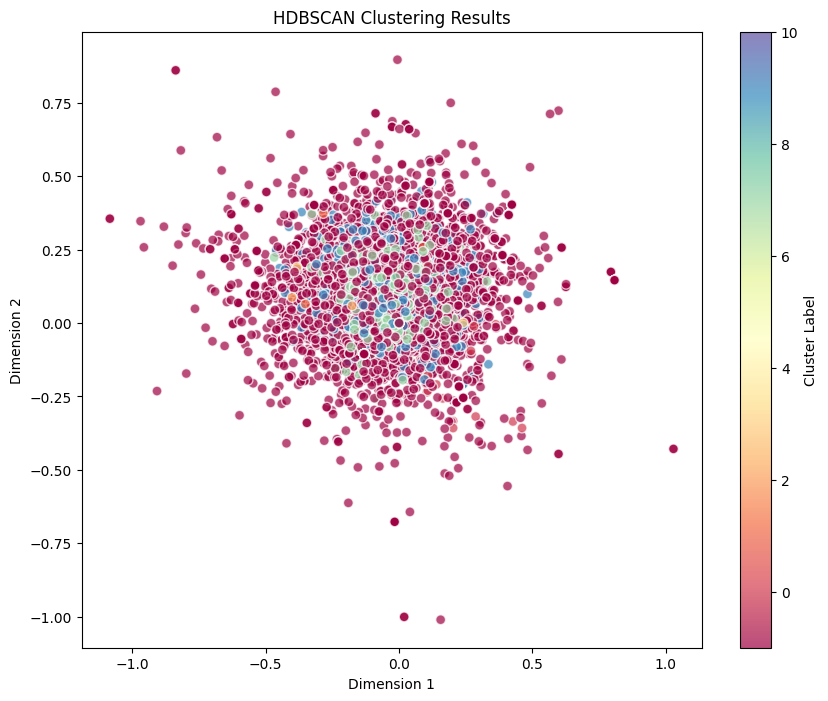

In [162]:
# Plotting
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Spectral', alpha=0.7, edgecolors='w', s=50)
plt.colorbar(scatter, label='Cluster Label')
plt.title('HDBSCAN Clustering Results')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

## 7. dataset
* embeddings: distilbert
* data: mean embeddings

In [10]:
# import data
emb = pd.read_json('~/thesis/embeddings/response_distilbert_mentions_mean.jsonl', orient = 'index')

In [11]:
emb.head(5)

,mentions_mean
200015,"[-0.0314763884, 0.0386100511, -0.1742462516, -..."
200022,"[-0.0759805093, -0.0740594914, 0.0240943432, -..."
200039,"[-0.15026521680000002, -0.1103845884, -0.10263..."
200046,"[-0.1957150598, -0.0617878518, -0.134287744700..."
200053,"[-0.0684372634, -0.024012153300000002, -0.1661..."


In [12]:
# "transform embedding"
from ast import literal_eval
emb['mentions_mean'] = emb['mentions_mean'].apply(np.array)  # convert list to numpy array
matrix = np.vstack(emb['mentions_mean'].values)
matrix.shape

(7298, 768)

In [13]:
X = matrix.copy()

In [14]:
# reproducibility assured
np.random.seed(11)

model = hd.HDBSCAN(min_cluster_size = 10, min_samples = 10)

In [15]:
labels = model.fit_predict(X)

array([-1,  0,  1])

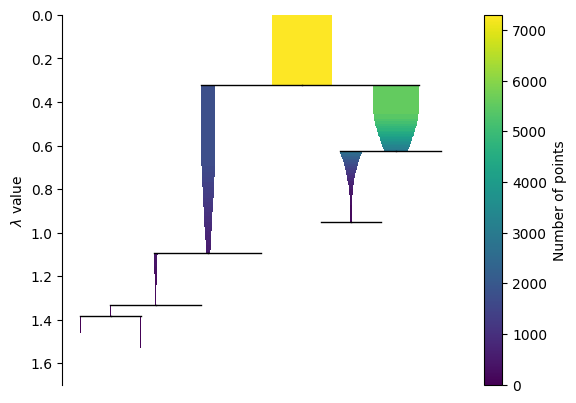

In [16]:
model.condensed_tree_.plot(select_clusters = False)

np.unique(labels)

In [17]:
# Cluster labels obtained from clustering algorithm

from sklearn import metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist

final_cluster_labels = labels # cluster_labels_from_bert
X # contextualized tokens of the input texts.

# Specify the question that is addressed. 
print("\n\"Question 1\"\n")

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, final_cluster_labels)
print(f"Silhouette Coefficient: {silhouette}")

# Calculate Calinski-Harabasz Index
calinski = calinski_harabasz_score(X, final_cluster_labels)
print(f"Calinski-Harabasz Index: {calinski}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, final_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


"Question 1"

Silhouette Coefficient: 0.42712208416588
Calinski-Harabasz Index: 2604.2286043704116
Davies-Bouldin Index: 0.6944210270926314


## 2D visualization: UMAP
check the clustering when reducing the dimensionality

In [18]:
# high dimensional data to 2D data
reducer_2d = umap.UMAP(n_components=2, random_state=42)
embedding_2d = reducer_2d.fit_transform(X)

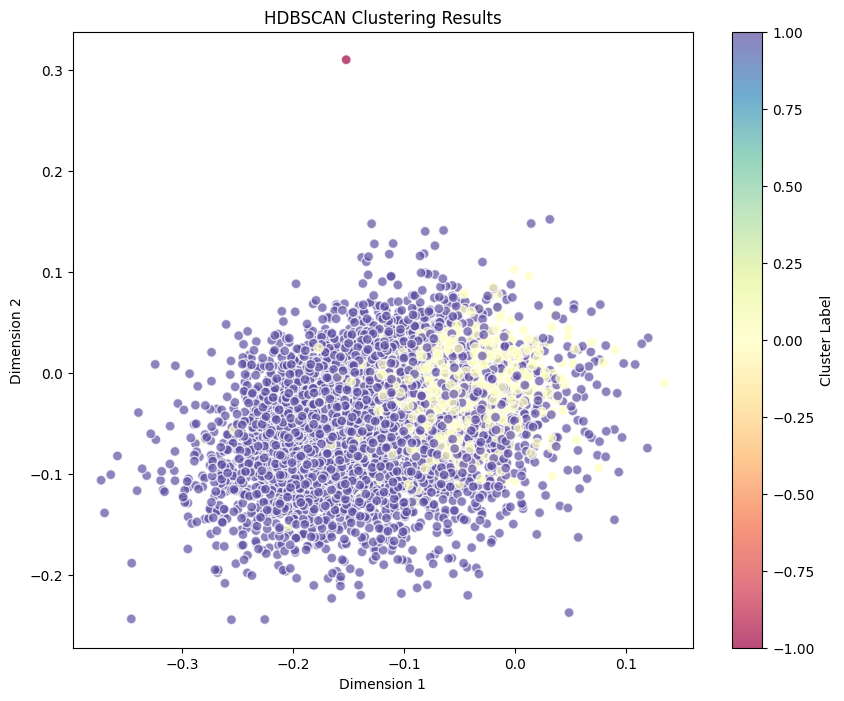

In [19]:
# Plotting
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Spectral', alpha=0.7, edgecolors='w', s=50)
plt.colorbar(scatter, label='Cluster Label')
plt.title('HDBSCAN Clustering Results')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

## 8. dataset
* embeddings: glove
* data: mean embeddings

In [20]:
# import data
emb = pd.read_json('~/thesis/embeddings/response_glove_mentions_mean.jsonl', orient = 'index')

In [21]:
emb.head(5)

,mentions_mean
200015,"[-0.0769432535, -0.0524500807, -0.081091667200..."
200022,"[-0.0768528978, 0.0966741145, 0.0397233342, 0...."
200039,"[0.0233196666, 0.0421366691, 0.0449909338, 0.0..."
200046,"[-0.0362072003, 0.0760778983, -0.011441807, -0..."
200053,"[-0.0209387005, -0.0598936516, 0.1127253125000..."


In [22]:
# "transform embedding"
from ast import literal_eval
emb['mentions_mean'] = emb['mentions_mean'].apply(np.array)  # convert list to numpy array
matrix = np.vstack(emb['mentions_mean'].values)
matrix.shape

(7298, 300)

In [23]:
X = matrix.copy()

In [24]:
# reproducibility assured
np.random.seed(11)

model = hd.HDBSCAN(min_cluster_size = 10, min_samples = 10)

In [25]:
labels = model.fit_predict(X)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

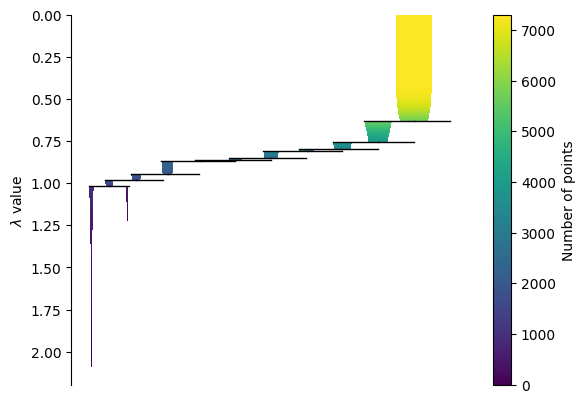

In [26]:
model.condensed_tree_.plot(select_clusters = False)

np.unique(labels)

In [27]:
# Cluster labels obtained from clustering algorithm

from sklearn import metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist

final_cluster_labels = labels # cluster_labels_from_bert
X # contextualized tokens of the input texts.

# Specify the question that is addressed. 
print("\n\"Question 1\"\n")

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, final_cluster_labels)
print(f"Silhouette Coefficient: {silhouette}")

# Calculate Calinski-Harabasz Index
calinski = calinski_harabasz_score(X, final_cluster_labels)
print(f"Calinski-Harabasz Index: {calinski}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, final_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


"Question 1"

Silhouette Coefficient: -0.13335913560836635
Calinski-Harabasz Index: 70.14578665342596
Davies-Bouldin Index: 1.6912130012516007


## 2D visualization: UMAP
check the clustering when reducing the dimensionality

In [28]:
# high dimensional data to 2D data
reducer_2d = umap.UMAP(n_components=2, random_state=42)
embedding_2d = reducer_2d.fit_transform(X)

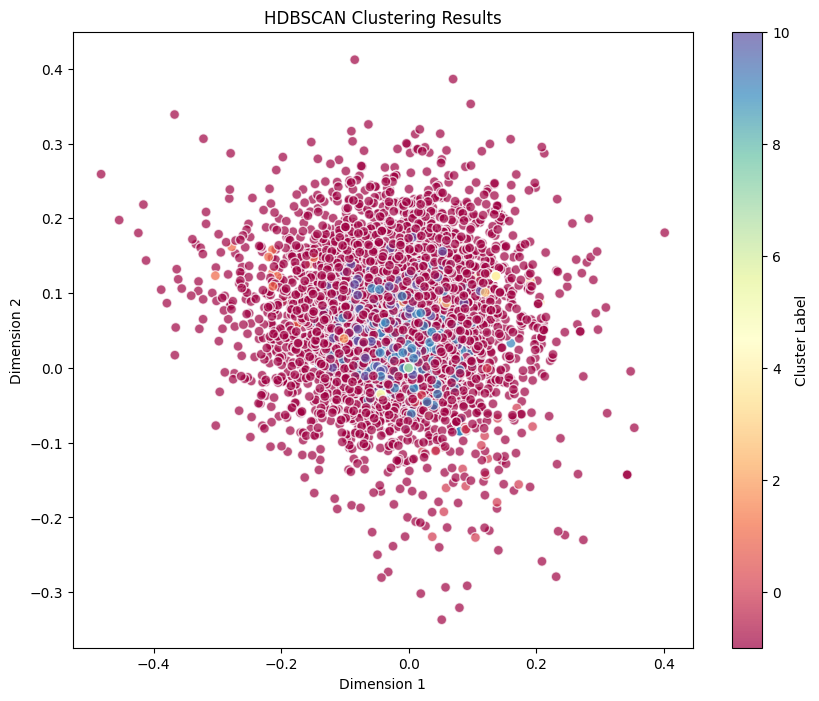

In [29]:
# Plotting
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Spectral', alpha=0.7, edgecolors='w', s=50)
plt.colorbar(scatter, label='Cluster Label')
plt.title('HDBSCAN Clustering Results')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

## 9. dataset
* embeddings: word2vec
* data: mean embeddings

In [30]:
# import data
emb = pd.read_json('~/thesis/embeddings/response_word2vec_mentions_mean.jsonl', orient = 'index')

In [31]:
emb.head(5)

,mentions_mean
200015,"[0.0065917969, -0.0265572866, 0.0276947021, -0..."
200022,"[-0.0086805553, 0.0271267369, 0.00874837240000..."
200039,"[-0.0267537441, 0.0208184992, -0.0219184024000..."
200046,"[0.106254071, -0.1744059244, -0.035160318, 0.2..."
200053,"[0.057296599000000004, -0.0079153429, 0.060788..."


In [32]:
# "transform embedding"
from ast import literal_eval
emb['mentions_mean'] = emb['mentions_mean'].apply(np.array)  # convert list to numpy array
matrix = np.vstack(emb['mentions_mean'].values)
matrix.shape

(7298, 300)

In [33]:
X = matrix.copy()

In [34]:
# reproducibility assured
np.random.seed(11)

model = hd.HDBSCAN(min_cluster_size = 10, min_samples = 10)

In [35]:
labels = model.fit_predict(X)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8])

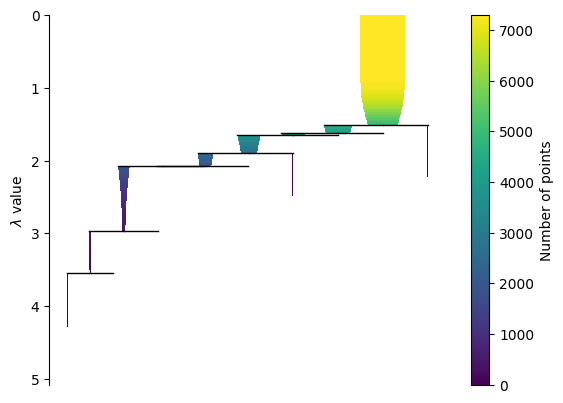

In [36]:
model.condensed_tree_.plot(select_clusters = False)

np.unique(labels)

In [37]:
# Cluster labels obtained from clustering algorithm

from sklearn import metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist

final_cluster_labels = labels # cluster_labels_from_bert
X # contextualized tokens of the input texts.

# Specify the question that is addressed. 
print("\n\"Question 1\"\n")

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, final_cluster_labels)
print(f"Silhouette Coefficient: {silhouette}")

# Calculate Calinski-Harabasz Index
calinski = calinski_harabasz_score(X, final_cluster_labels)
print(f"Calinski-Harabasz Index: {calinski}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, final_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


"Question 1"

Silhouette Coefficient: -0.2529751056245456
Calinski-Harabasz Index: 62.26679025483597
Davies-Bouldin Index: 1.830231749461872


## 2D visualization: UMAP
check the clustering when reducing the dimensionality

In [38]:
# high dimensional data to 2D data
reducer_2d = umap.UMAP(n_components=2, random_state=42)
embedding_2d = reducer_2d.fit_transform(X)

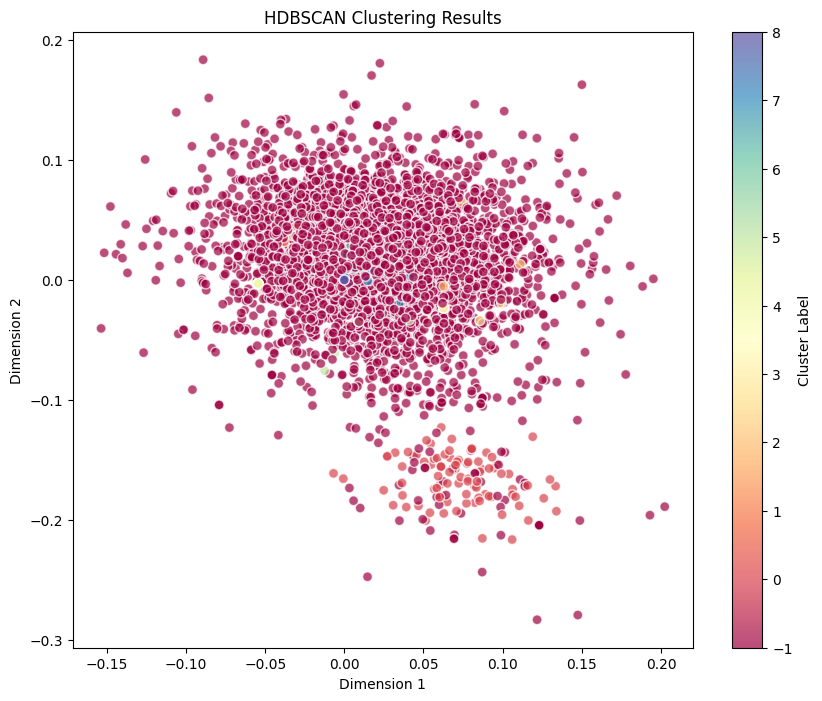

In [39]:
# Plotting
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Spectral', alpha=0.7, edgecolors='w', s=50)
plt.colorbar(scatter, label='Cluster Label')
plt.title('HDBSCAN Clustering Results')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()